In [28]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    

In [29]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path=os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [30]:
train_data=load_titanic_data("train.csv")
test_data=load_titanic_data("test.csv")

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train_data.shape

(891, 12)

In [33]:
train_data=train_data.set_index("PassengerId")
test_data=test_data.set_index("PassengerId")

In [34]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train_data.shape

(891, 11)

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [37]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
train_data[train_data["Sex"]=="female"]["Age"].median()

np.float64(27.0)

In [39]:
train_data["Age"].median()

np.float64(28.0)

In [40]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [41]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [42]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [43]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [45]:
#making pipe line for numerical attributes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

In [48]:
#making pipeline for categorical attributes

from sklearn.preprocessing import OneHotEncoder

cat_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse_output=False))
])

In [51]:
#combining two pipelines into one

from sklearn.compose import ColumnTransformer

num_attribs=["Age", "SibSp", "Parch", "Fare"]
cat_attribs=["Pclass", "Sex", "Embarked"]

preprocess_pipeline=ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [52]:
X_train=preprocess_pipeline.fit_transform(
    train_data[num_attribs+cat_attribs])
X_train[0]

array([-0.56573582,  0.43279337, -0.47367361, -0.50244517,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ])

In [53]:
y_train=train_data["Survived"]
y_train[:5]

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [54]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
X_test=preprocess_pipeline.transform(test_data[num_attribs+cat_attribs])
y_pred=forest_clf.predict(X_test)
y_pred[:5]

array([0, 0, 0, 1, 1])

In [56]:
from sklearn.model_selection import cross_val_score

forest_scores=cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores

array([0.75555556, 0.79775281, 0.76404494, 0.80898876, 0.88764045,
       0.83146067, 0.83146067, 0.7752809 , 0.84269663, 0.84269663])

In [57]:
forest_scores.mean()

np.float64(0.8137578027465668)

In [58]:
#SVC classifier

from sklearn.svm import SVC

svm_clf=SVC(gamma="auto")
svm_scores=cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores

array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.83146067,
       0.79775281, 0.82022472, 0.78651685, 0.85393258, 0.84269663])

In [59]:
svm_scores.mean()

np.float64(0.8249313358302123)

/tmp/ipykernel_329892/174287692.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))


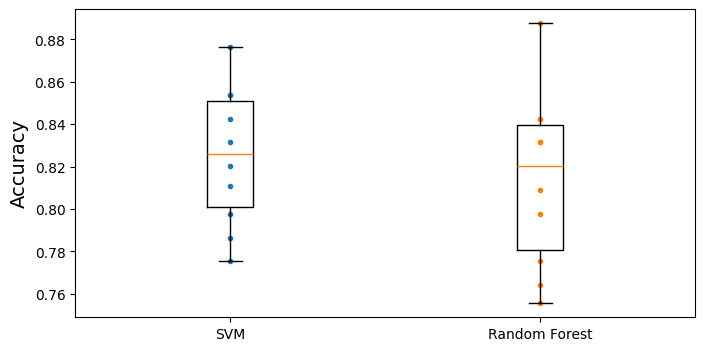

In [63]:
#comparing svm scores and random forest score with box plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10,  forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [ ]:
#According to box plot, we can see SVM is better than random forest.